# Cancer detection using svm

In [97]:
import pandas as pd
#import scikitlearn in that svm ie support vector machine from that svc which is Support Vector Classification.
from sklearn.svm import SVC
#it is used to split the dataset into two parts one for training and one more for testing 
from sklearn.model_selection import train_test_split
#it is used to check the accuracy of the model 
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve,recall_score,precision_recall_curve, average_precision_score,accuracy_score, confusion_matrix, classification_report#
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV
from sklearn.feature_selection import RFECV 

In [ ]:

#creating the dataframe for the cancer csv file
cancer_data=pd.read_csv("cancer.csv")
#displaying the top most contents of it,to see the attribtes
cancer_data.head()


In [ ]:
cancer_data.shape

**Attributes**
ID=Shows patient id
ClumpThickness:values can vary from 1 - 10.
Cell Size:values can vary from 1 - 10.
Cell Shape:values can vary from 1 - 10.
Marginal Adhesion	:values can vary from 1 - 10.
Single Epithelial Cell Size:values can vary from 1 - 10.
Bare Nuclei	:values can vary from 1 - 10.
Normal Nucleoli	:values can vary from 1 - 10.
Bland Chromatin	:values can vary from 1 - 10.
Mitoses	:values can vary from 1 - 10.
Class:values can be either 2 or 4
2 means ben


In [ ]:
#X=cancer_data[["ClumpThickness","Cell Size","Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Normal Nucleoli","Bland Chromatin","Mitoses"]]
#drops id and class column and keeps other attributes stored in it
df_melatonin=cancer_data.loc[cancer_data["Class"]==4]

df_melatonin

In [ ]:
df_bengin=cancer_data.loc[cancer_data["Class"]==2]
df_bengin

In [ ]:
visulization= cancer_data.groupby('Class').size().plot(kind='pie', autopct='%.2f', figsize=(6,6), colors=['#BC7FCD','#FB9AD1'],explode=[0.1,0.1])#pie chart 

In [ ]:
#dropping the unnecessary data values and converting bare nuclei to int64 from object
dropping=cancer_data[ (cancer_data['Bare Nuclei'] =="?")].index
cancer_data.drop(dropping , inplace=True)#stores the value same to the dataframe
cancer_data['Bare Nuclei'].astype(str).astype(int)#conversion of object to string then to integer

In [ ]:
X=cancer_data.drop("Class", axis=1)
X=cancer_data.drop("ID",axis=1)

In [ ]:
#Stores the output value
y=cancer_data["Class"]
y

In [ ]:
#train test split will split the x and y values to 4 tuples in this case we are 
#considering train size to be 80% and test size to be 20% of the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
parameters={
              'C': [0.1, 1,5, 10,15,20,100,500],  
              'gamma': [0.5,0.80,1, 0.1], 
            'kernel': ['rbf']}#here rbf=radial basis function 
     
modelsvc=SVC()

In [ ]:
svm_rbf = DaskGridSearchCV(modelsvc, param_grid = parameters, cv = 5, n_jobs = -1)#cv is cross validation and n_jobs is for parallel processing of the model


In [ ]:
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [ ]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (svm_rbf.best_params_, svm_rbf.best_score_)
)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
cm

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

**roc and auc**

AUC (Area Under the Curve): A single metric representing the overall performance of a binary classification model based on the area under its ROC curve.

ROC Curve (Receiver Operating Characteristic Curve): A graphical plot illustrating the trade-off between True Positive Rate and False Positive Rate at various classification thresholds.

True Positive Rate (Sensitivity): Proportion of actual positives correctly identified by the model.

False Positive Rate: The model incorrectly classifies the proportion of actual negatives as positives.

Specificity (True Negative Rate): Proportion of actual negatives correctly identified by the model.

In [96]:
auc_score = roc_auc_score(y_test, y_pred_rbf)

print("AUC Score on Test Data:", auc_score)

AUC Score on Test Data: 0.9887640449438202


---------------------------------------------------------------------------------------------------

for polynomial kernal

In [ ]:
parameters={
              'C': [0.1, 1,5, 10,15,20,100,500],  
              'gamma': [0.5,0.80,1, 0.1], 
            'kernel': ['poly']}#here rbf=radial basis function 
     
modelsvc=SVC()  

svm_poly = DaskGridSearchCV(modelsvc, param_grid = parameters, cv = 5, n_jobs = -1)#cv is cross validation and n_jobs is for parallel processing of the model


In [ ]:
svm_poly.fit(X_train, y_train)

In [ ]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (svm_poly.best_params_, svm_poly.best_score_)
)

In [ ]:
y_pred_poly=svm_poly.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
cm

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_poly))

In [95]:
auc_score = roc_auc_score(y_test, y_pred_poly)

print("AUC Score on Test Data:", auc_score)

AUC Score on Test Data: 1.0


-----------------------------------------------------------------------------------------------------

for linear

In [138]:
svm_linear = RFECV(SVC(kernel='linear'),cv=5) 

In [139]:
#parameters={
#              'C': [0.1, 1,5, 10,15,20,100,500],  
#              'gamma': [0.5,0.80,1, 0.1],              'kernel': ['linear']}#here rbf=radial basis function 
#modelsvc=SVC()  
#svm_linear = DaskGridSearchCV(modelsvc, param_grid = parameters, cv = 5, n_jobs = -1)#cv is cross validation and n_jobs is for parallel processing of the model


In [140]:
svm_linear.fit(X_train, y_train)

RFECV(cv=5, estimator=SVC(kernel='linear'))

In [141]:
y_pred_linear=svm_linear.predict(X_test)

In [143]:
svm_linear.n_features_#no of features selected by the model

1

In [144]:
accuracy = accuracy_score(y_test, y_pred_linear)
print("Accuracy:", accuracy)

Accuracy: 1.0


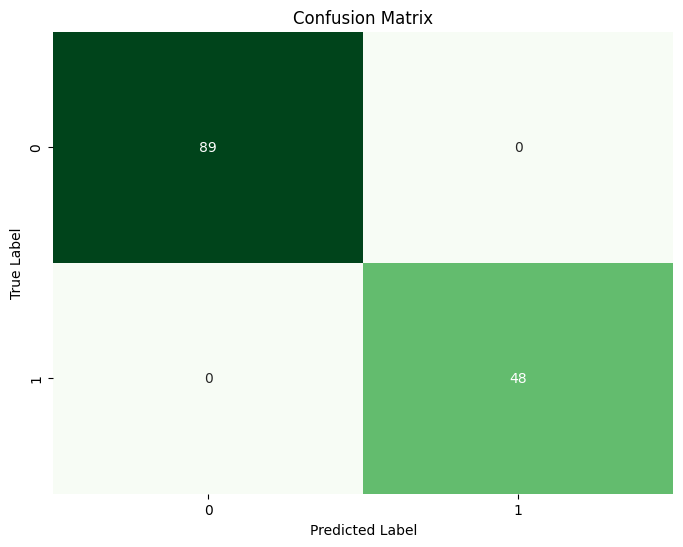

array([[89,  0],
       [ 0, 48]], dtype=int64)

In [127]:
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
cm

In [145]:
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        89
           4       1.00      1.00      1.00        48

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



In [146]:
auc_score = roc_auc_score(y_test, y_pred_linear)

print("AUC Score on Test Data:", auc_score)

AUC Score on Test Data: 1.0


----------------------------------------------------------------------------------------------------

for sigmoid

In [129]:
parameters={
              'C': [0.1, 1,5, 10,15,20,100,500],  
              'gamma': [0.5,0.80,1, 0.1], 
            'kernel': ['sigmoid']}#here rbf=radial basis function 
     
modelsvc=SVC()  

svm_sigmoid = DaskGridSearchCV(modelsvc, param_grid = parameters, cv = 5, n_jobs = -1)#cv is cross validation and n_jobs is for parallel processing of the model


In [130]:
svm_sigmoid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 15, 20, 100, 500],
                         'gamma': [0.5, 0.8, 1, 0.1], 'kernel': ['sigmoid']})

In [131]:
y_pred_sigmoid=svm_sigmoid.predict(X_test)

In [132]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (svm_sigmoid.best_params_, svm_sigmoid.best_score_)
)

The best parameters are {'C': 0.1, 'gamma': 0.5, 'kernel': 'sigmoid'} with a score of 0.65


In [133]:
accuracy = accuracy_score(y_test, y_pred_sigmoid)
accuracy

0.6496350364963503

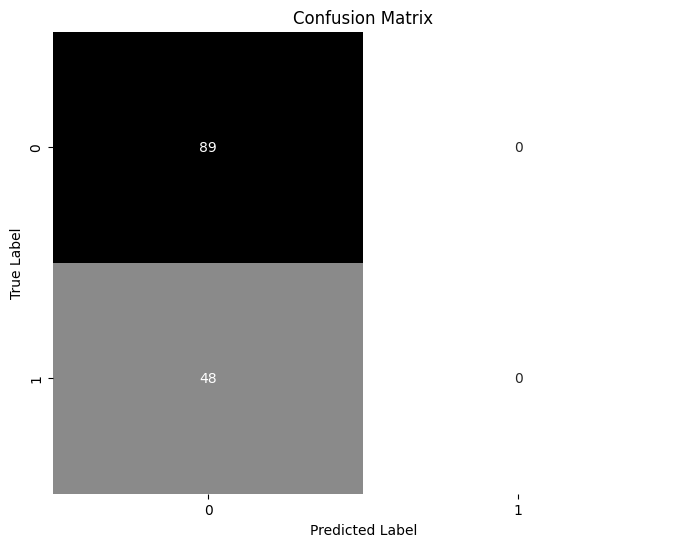

array([[89,  0],
       [48,  0]], dtype=int64)

In [134]:
cm = confusion_matrix(y_test, y_pred_sigmoid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
cm

In [135]:
print("Classification Report:")
print(classification_report(y_test, y_pred_sigmoid))

Classification Report:
              precision    recall  f1-score   support

           2       0.65      1.00      0.79        89
           4       0.00      0.00      0.00        48

    accuracy                           0.65       137
   macro avg       0.32      0.50      0.39       137
weighted avg       0.42      0.65      0.51       137



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [136]:
auc_score = roc_auc_score(y_test, y_pred_sigmoid)

print("AUC Score on Test Data:", auc_score)

AUC Score on Test Data: 0.5


--------------------------------------------------------------------------------------------------------